# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset ( fraud) 

In [2]:
fraud = pd.read_csv(r"C:\Users\Binita Mandal\Desktop\finity\Decision Tree\Fraud_check.csv")

In [3]:
fraud.head() # to check first 5 rows of dataset

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.tail() # to check last 5 rows

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
# shape of the data

fraud.shape

(600, 6)

In [6]:
# checking missing values in the data

fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
# Lets make copy of fraud data set
fraud1 = fraud.copy()

In [9]:
fraud1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [10]:
# Now lets rename the column to get better understanding
fraud1.columns = ['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population', 'Work_Experience', 'Urban']

# Lets get EDA of dataset

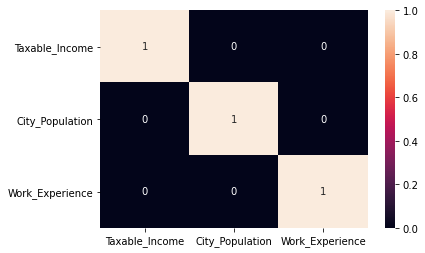

In [11]:
sns.heatmap(fraud1.corr()>0.6, annot = True)
plt.show()

#### From above we can say that, there is no correlation of dependent to independent and independent to independent variables

# Lets preprocess the data again

In [12]:
# Lets seperate the data
X = fraud1.drop(['Taxable_Income'], axis = 1)

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
X.head()

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [15]:
y = pd.DataFrame(fraud1['Taxable_Income'])

In [16]:
y.head()

,Taxable_Income
0,68833
1,33700
2,36925
3,50190
4,81002


In [17]:
for i in y.Taxable_Income:
    if i<= 30000:
        y['Taxable_Income'] = y['Taxable_Income'].replace(i,'Risky')
    else:
        y['Taxable_Income'] = y['Taxable_Income'].replace(i,'Good')

In [18]:
y.head()

,Taxable_Income
0,Good
1,Good
2,Good
3,Good
4,Good


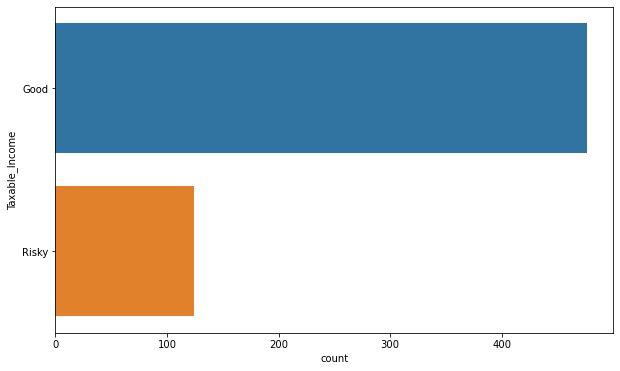

In [19]:
# Checking for data imbalnce condition if any
plt.figure(figsize=(10,6))
aX = sns.countplot(y ="Taxable_Income", data = y)

# Model Building

In [20]:
# Splitting data into train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify =y, random_state = 101)

In [21]:
x_train

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
599,158137,16,0,0,0,0
239,76145,26,0,0,0,0
355,56488,17,1,0,1,0
559,180424,26,1,0,0,0
398,64070,2,0,1,0,1
...,...,...,...,...,...,...
237,128996,3,0,1,0,1
537,100651,6,1,0,1,0
264,118899,5,0,0,1,0
144,156503,29,1,0,1,1


In [22]:
x_test

,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES
568,150036,22,0,0,1,1
364,62943,17,1,1,0,0
561,36861,29,0,1,0,1
553,26884,13,0,0,1,1
153,114841,28,1,0,0,0
...,...,...,...,...,...,...
78,143153,0,1,0,0,0
487,83402,13,1,0,1,1
229,35780,10,0,1,0,0
504,198571,19,0,0,0,1


In [23]:
y_train

,Taxable_Income
599,Good
239,Good
355,Good
559,Good
398,Risky
...,...
237,Risky
537,Good
264,Good
144,Good


In [24]:
y_test

,Taxable_Income
568,Good
364,Good
561,Good
553,Good
153,Risky
...,...
78,Good
487,Good
229,Good
504,Good


In [25]:
pd.value_counts(y_train.values.flatten())

Good     381
Risky     99
dtype: int64

In [26]:
pd.value_counts(y_test.values.flatten())

Good     95
Risky    25
dtype: int64

In [27]:
# feature scaling
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [28]:
#Fitting a Decision-Tree algorithm to the Training set
#Decisio  Tree Algorithms
#1. ID3
#Fitting Decision Tree classifier to the training set  

# crieterian ='entropy' for ID3 method

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy', random_state= 10)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [29]:
model1.score(x_train, y_train)

1.0

In [30]:
model1.score(x_test, y_test)

0.6416666666666667

In [31]:
model1.feature_importances_

array([0.61382423, 0.21009742, 0.0306341 , 0.03468041, 0.02588275,
       0.08488109])

In [32]:
y_pred = model1.predict(x_test)

In [33]:
#Here first column is for 'Good', & second is for 'Risky'
model1.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [34]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[76, 19],
       [24,  1]], dtype=int64)

# Hyperparameter tuning

In [35]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [36]:
fraud2 = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

In [37]:
fraud2

,max_depth,train_acc,test_acc
0,1,0.793750,0.791667
1,2,0.797917,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.816667,0.783333
5,6,0.822917,0.783333
6,7,0.837500,0.725000
7,8,0.868750,0.666667
8,9,0.885417,0.741667
9,10,0.897917,0.691667


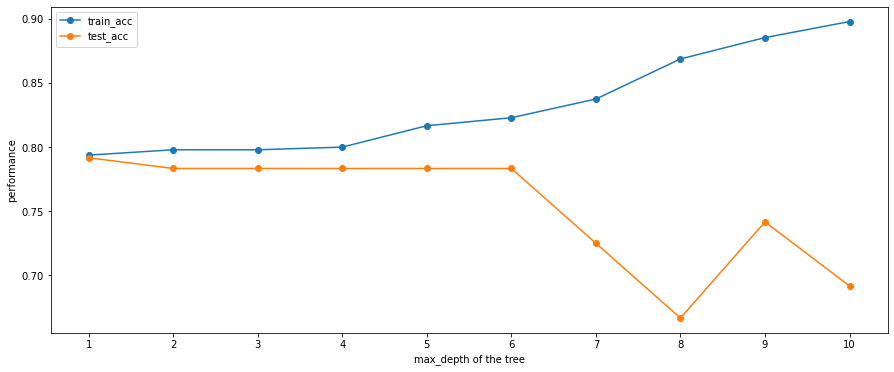

In [38]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(fraud2['max_depth'], fraud2['train_acc'], marker = 'o')
plt.plot(fraud2['max_depth'], fraud2['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

### Here we can find out that, for max_depth is equal to 5 the train & test accuracies are closer together.

In [39]:
# Model Building
def hyper_tuned_model(criterion,max_depth, x_train, y_train, x_test, y_test):
    model1 = DecisionTreeClassifier(criterion=criterion, random_state=10, max_depth=max_depth)
    print(model1.fit(x_train, y_train))
    print('train_score:',model1.score(x_train, y_train))
    print('test_score:',model1.score(x_test, y_test))

In [40]:
y_pred = model1.predict(x_test)

In [41]:
# Tree Plot
def plot_tree(model):

    from sklearn import tree

    features = list(X.columns)
    classes = list(y.Taxable_Income.unique())

    fig, axex = plt.subplots(nrows=1, ncols=1,figsize=(20,10), dpi=300)
    tree.plot_tree(model,feature_names= features, class_names=classes, filled=True)
    plt.show()
    
    
    from sklearn.tree import export_text
    r = export_text(model, feature_names=features)
    print(r)

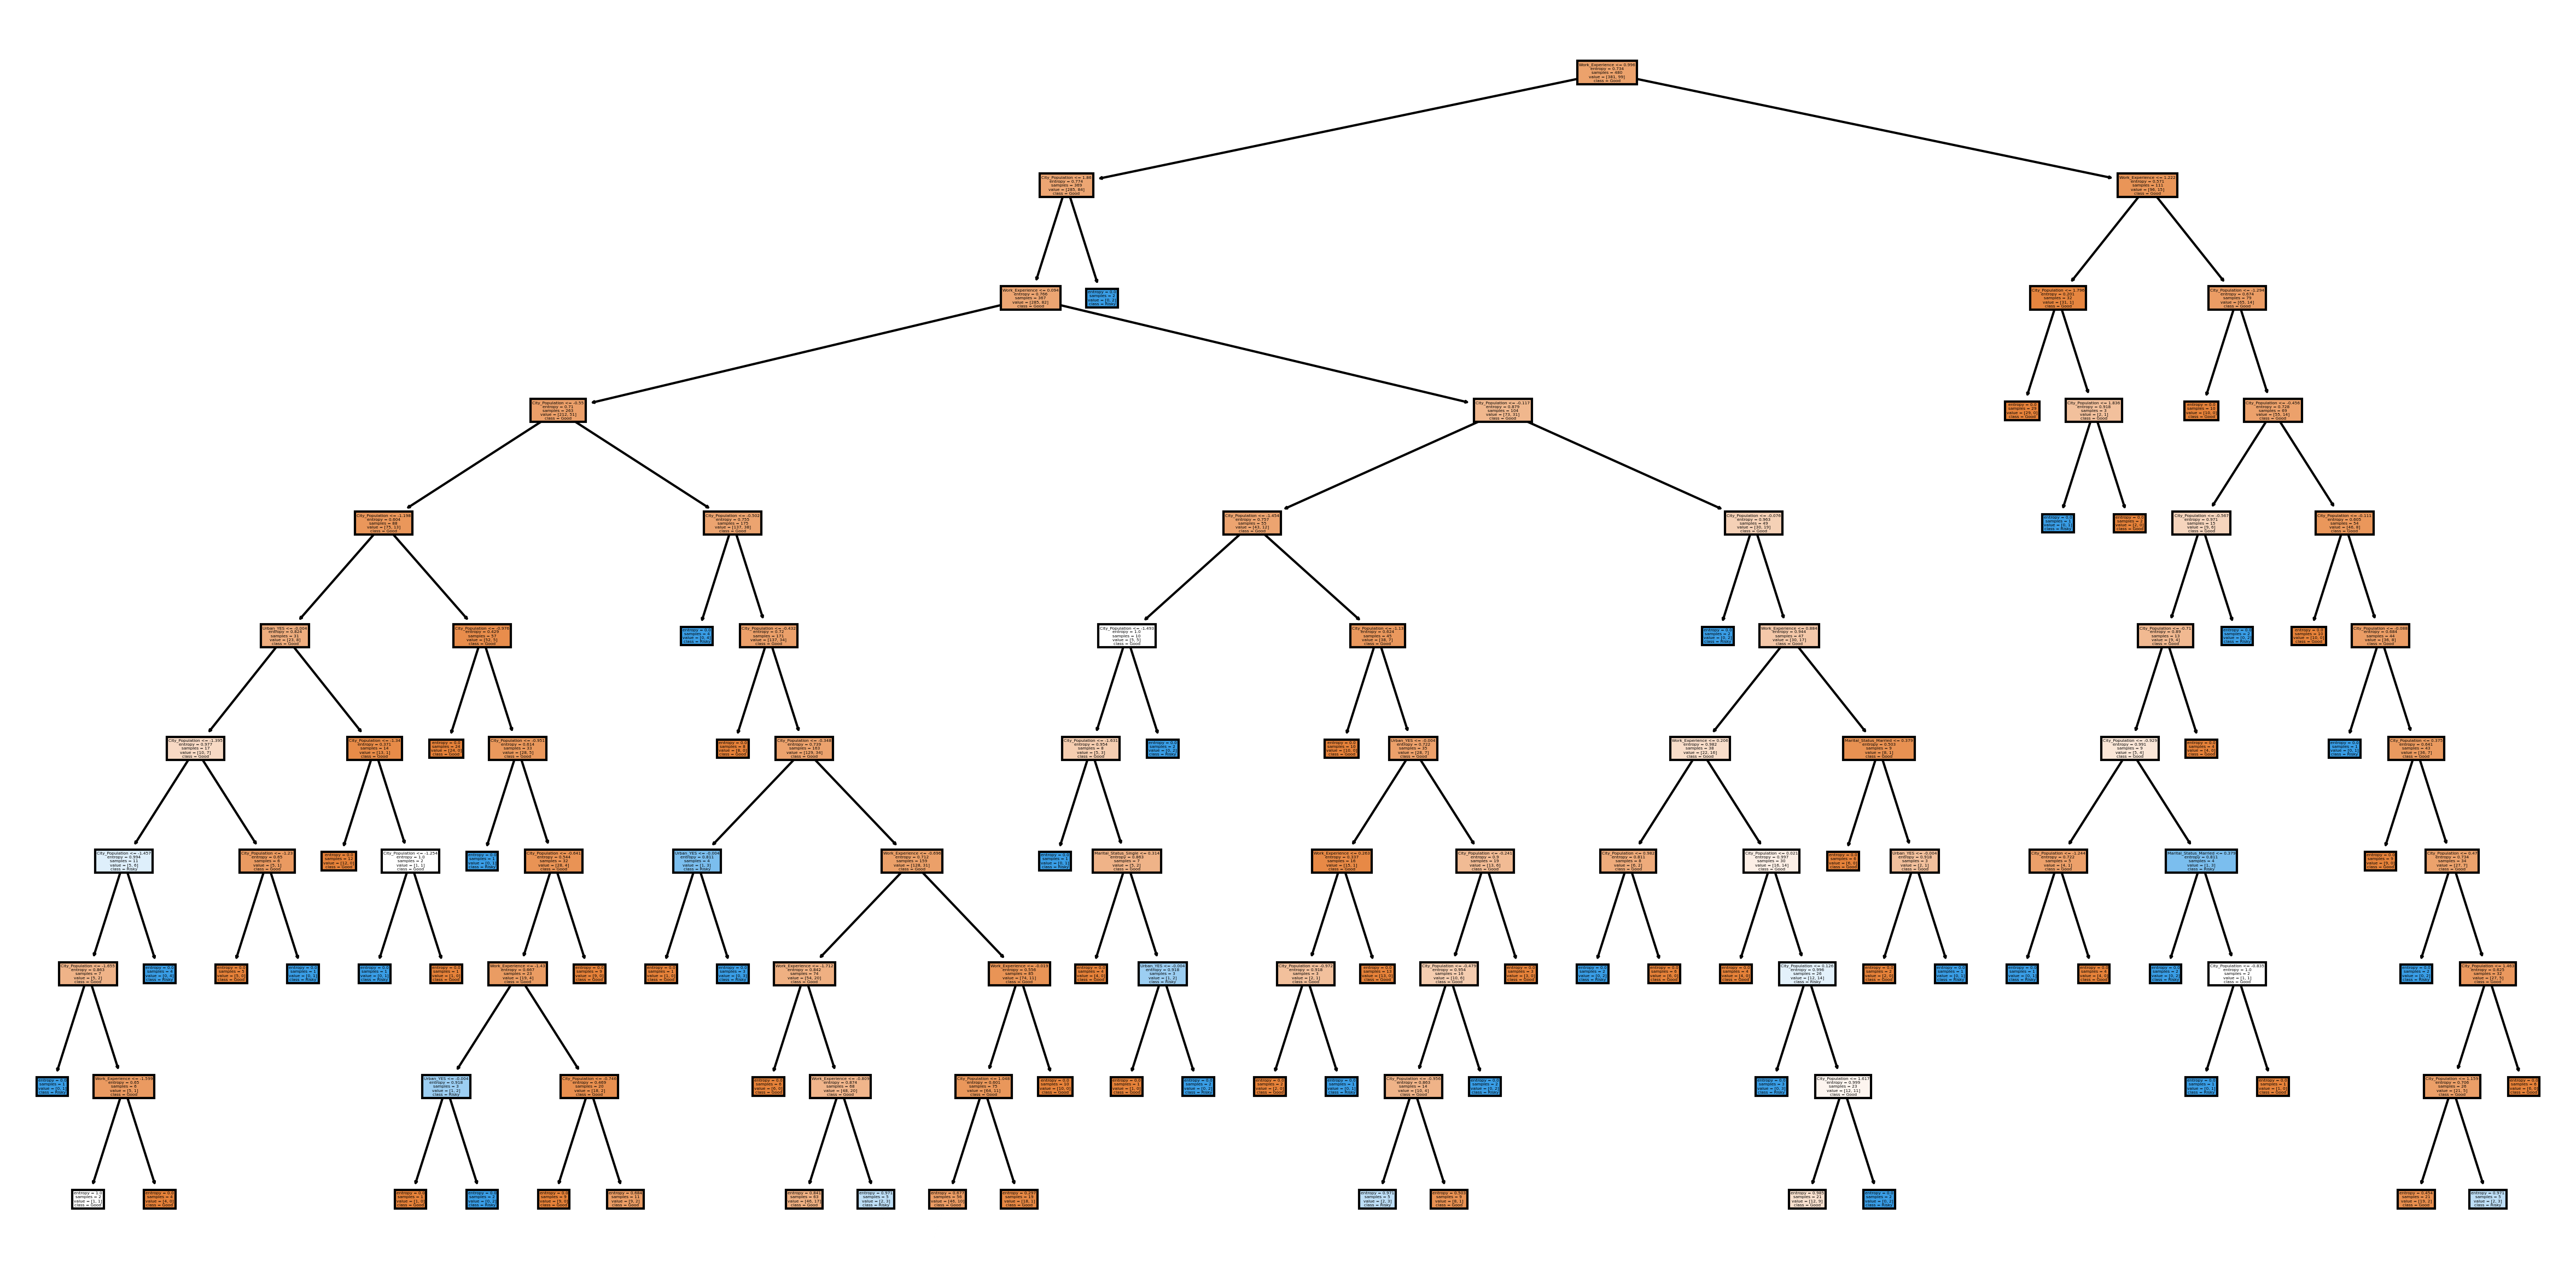

|--- Work_Experience <= 1.00
|   |--- City_Population <= 1.86
|   |   |--- Work_Experience <= 0.09
|   |   |   |--- City_Population <= -0.55
|   |   |   |   |--- City_Population <= -1.20
|   |   |   |   |   |--- Urban_YES <= -0.00
|   |   |   |   |   |   |--- City_Population <= -1.40
|   |   |   |   |   |   |   |--- City_Population <= -1.46
|   |   |   |   |   |   |   |   |--- City_Population <= -1.65
|   |   |   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |   |   |--- City_Population >  -1.65
|   |   |   |   |   |   |   |   |   |--- Work_Experience <= -1.60
|   |   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |   |   |--- Work_Experience >  -1.60
|   |   |   |   |   |   |   |   |   |   |--- class: Good
|   |   |   |   |   |   |   |--- City_Population >  -1.46
|   |   |   |   |   |   |   |   |--- class: Risky
|   |   |   |   |   |   |--- City_Population >  -1.40
|   |   |   |   |   |   |   |--- City_Population <= -1.23
|   |   |   |

In [42]:
plot_tree(model1)

# Model Evalution

In [43]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[81, 14],
       [23,  2]], dtype=int64)

In [44]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.85      0.81        95
       Risky       0.12      0.08      0.10        25

    accuracy                           0.69       120
   macro avg       0.45      0.47      0.46       120
weighted avg       0.64      0.69      0.66       120



In [45]:
# Cross validation
from sklearn.model_selection import cross_val_score
for cv in range(2,10):
    print('for cv=',cv)
    print(np.mean(cross_val_score(model1, X, y, cv=cv)))
    print('-'*10)

for cv= 2
0.71
----------
for cv= 3
0.7050000000000001
----------
for cv= 4
0.715
----------
for cv= 5
0.6933333333333334
----------
for cv= 6
0.7200000000000001
----------
for cv= 7
0.746765683017393
----------
for cv= 8
0.7150000000000001
----------
for cv= 9
0.7151615659078346
----------


In [46]:
def feature_importance(model):

    feature_importance = pd.DataFrame({'features':X.columns,'feature_imp':model.feature_importances_})

    plt.figure(figsize=(15,6))
    sns.barplot(x='features', y='feature_imp',\
                data = feature_importance.sort_values(by='feature_imp', ascending=False))
    plt.show()

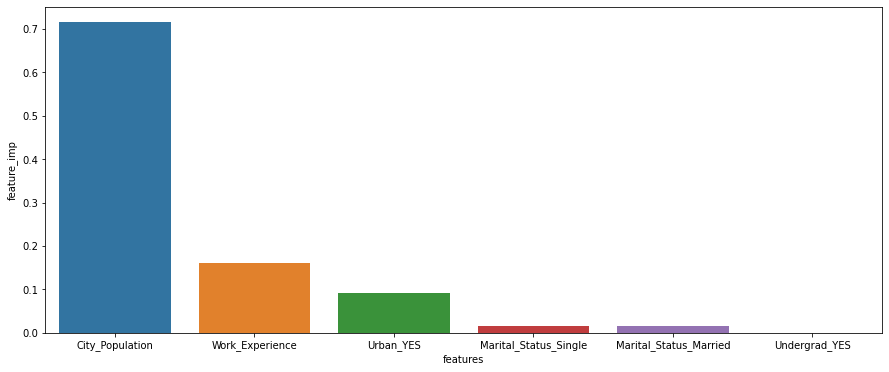

In [47]:
feature_importance(model1)

In [48]:
# Building Decision Tree suing CART
def grid_search_cv(x_train, y_train,cv =3):

    from sklearn.model_selection import GridSearchCV
    from sklearn.tree import DecisionTreeClassifier

    model2 =DecisionTreeClassifier()
    param_grid= {'criterion':['gini','entropy'],'splitter':['best'],'max_depth':[i for i in range(1,6)],\
                 'min_samples_split':[i for i in range(2,4)],\
                 'min_samples_leaf':[1,2,3],\
                 'max_features':[i for i in range(5,11)],'random_state':[10]}


    grid_search = GridSearchCV(estimator=model2, param_grid =param_grid,\
                               verbose=0, n_jobs=-1, scoring='accuracy', cv = 3)
    
    result = grid_search.fit(x_train, y_train)
    best_parameters =result.best_params_
    best_score = grid_search.best_score_
    
    print('best_param', best_parameters)
    print()
    print('best_score', best_score)

In [49]:
grid_search_cv(x_train, y_train)

best_param {'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}

best_score 0.7937499999999998


# Lets use SMOTE 

In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

BEFORE BALNCING


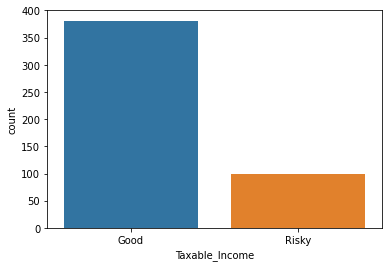

AFTER BALANCING


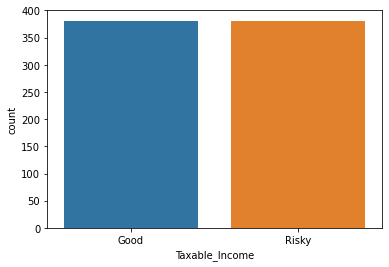

In [51]:
def data_balance_plot(imbalanced_Data, balanced_Data):
    data = [imbalanced_Data, balanced_Data]
    note = ['BEFORE BALNCING', 'AFTER BALANCING']
    count =note[0]
    for i in data:
        print(count)
        sns.countplot(x="Taxable_Income", data=i)
        plt.show()
        count = note[1]
                
data_balance_plot(y_train, y_train_smote)

In [52]:
print(grid_search_cv(x_train, y_train,cv=5))

best_param {'criterion': 'gini', 'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}

best_score 0.7937499999999998
None


In [53]:
print(grid_search_cv(x_train_smote, y_train_smote,cv=5))

best_param {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}

best_score 0.5800524934383202
None


### Here we can see this reduces the result of data